In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('weatherHistory.csv')

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Formatted Date is in object type. So need to convert it into datetime

In [4]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc= True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

The dataset has hourly temperature recorded for last 10 years
<br>
Set the **Formatted Date** as index for dataset

In [5]:
data.set_index('Formatted Date',inplace=True)
data.index

DatetimeIndex(['2006-03-31 22:00:00+00:00', '2006-03-31 23:00:00+00:00',
               '2006-04-01 00:00:00+00:00', '2006-04-01 01:00:00+00:00',
               '2006-04-01 02:00:00+00:00', '2006-04-01 03:00:00+00:00',
               '2006-04-01 04:00:00+00:00', '2006-04-01 05:00:00+00:00',
               '2006-04-01 06:00:00+00:00', '2006-04-01 07:00:00+00:00',
               ...
               '2016-09-09 12:00:00+00:00', '2016-09-09 13:00:00+00:00',
               '2016-09-09 14:00:00+00:00', '2016-09-09 15:00:00+00:00',
               '2016-09-09 16:00:00+00:00', '2016-09-09 17:00:00+00:00',
               '2016-09-09 18:00:00+00:00', '2016-09-09 19:00:00+00:00',
               '2016-09-09 20:00:00+00:00', '2016-09-09 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

### get required columns with resampling : 

**1] Apparent Temperature (C)**<br>
**2] Humidity**

In [6]:
df = data[['Apparent Temperature (C)','Humidity']].resample('M').mean()
df

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,8.923947,0.799906


We have the data as required in the form of dataframe df
<br><br>

Check the variations of Apparent temprature anf humidity over the 10 year by lineplot as below

Text(0.5, 1.0, 'Variations of Apparent Temperature and Humidity Over 10 years')

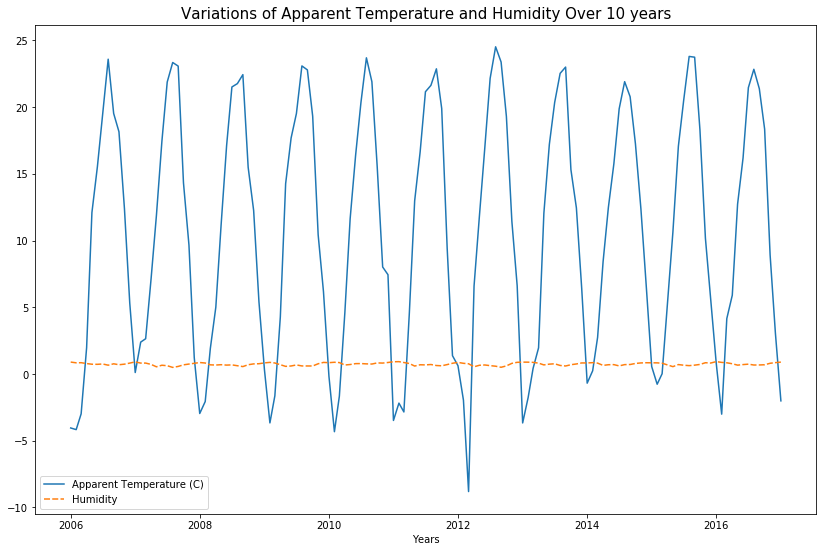

In [7]:
plt.figure(figsize=(14,9))
sns.lineplot(data=df)
plt.xlabel('Years')
plt.title('Variations of Apparent Temperature and Humidity Over 10 years',fontsize=15)

#### From above graph we can see that : 
<br>
1] There is negligible change in the humidity<br>
2] On other hand , Apparent Temperature varies a lot




Now Check the month wise variations of humidity and Apparent temperature
<br>


### Data set for each month as below

In [8]:
january = df[df.index.month==1]
february = df[df.index.month==2]
march = df[df.index.month==3]
april = df[df.index.month==4]
may = df[df.index.month==5]
june = df[df.index.month==6]
july = df[df.index.month==7]
august = df[df.index.month==8]
september = df[df.index.month==9]
october = df[df.index.month==10]
november = df[df.index.month==11]
december = df[df.index.month==12]

### Check the variations for months one by one

## January

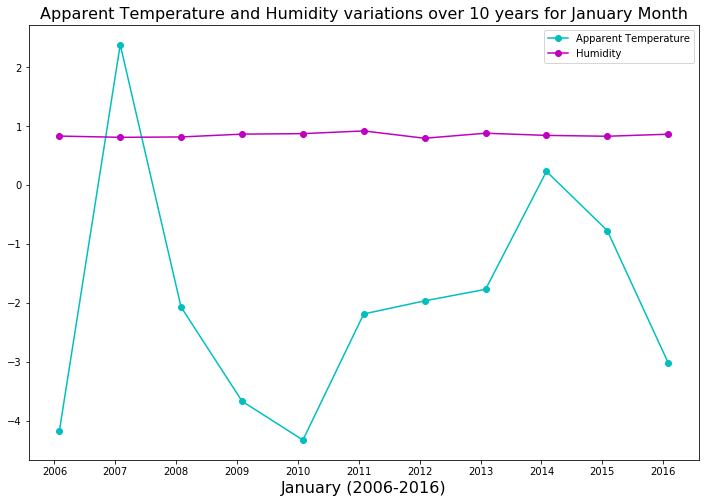

In [9]:
plt.figure(figsize=(12,8))
plt.plot(january['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(january['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for January Month',fontsize=16)
plt.xlabel('January (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

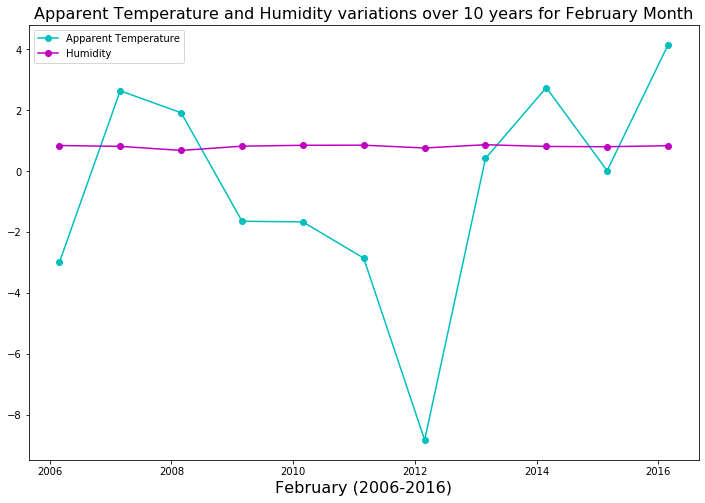

In [10]:
plt.figure(figsize=(12,8))
plt.plot(february['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(february['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for February Month',fontsize=16)
plt.xlabel('February (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

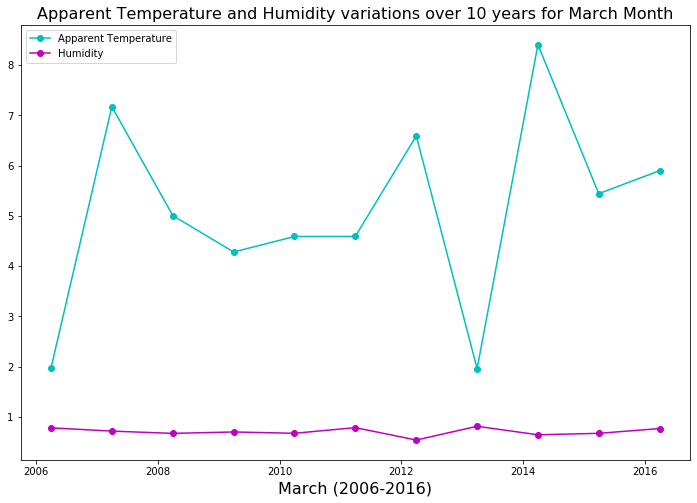

In [11]:
plt.figure(figsize=(12,8))
plt.plot(march['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(march['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for March Month',fontsize=16)
plt.xlabel('March (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

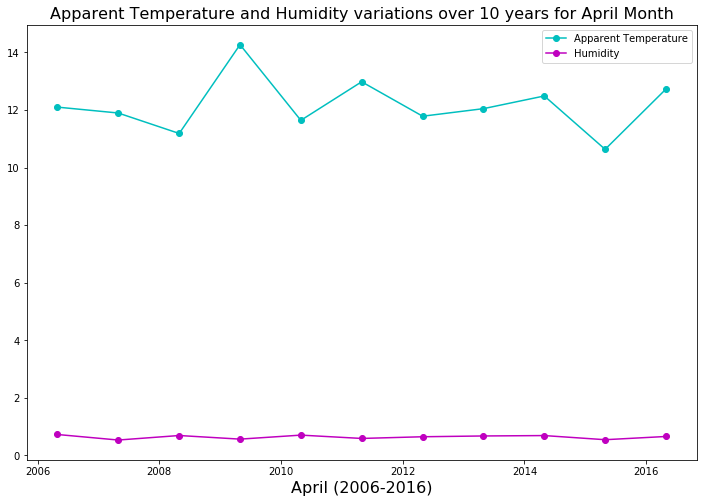

In [12]:
plt.figure(figsize=(12,8))
plt.plot(april['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(april['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for April Month',fontsize=16)
plt.xlabel('April (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

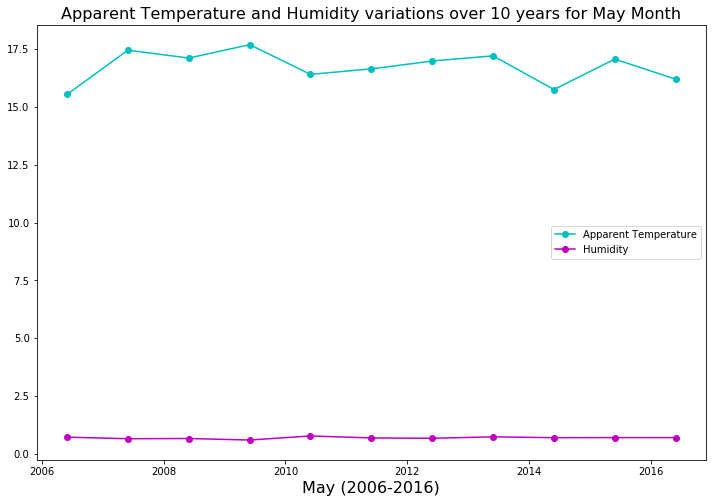

In [13]:
plt.figure(figsize=(12,8))
plt.plot(may['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(may['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for May Month',fontsize=16)
plt.xlabel('May (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

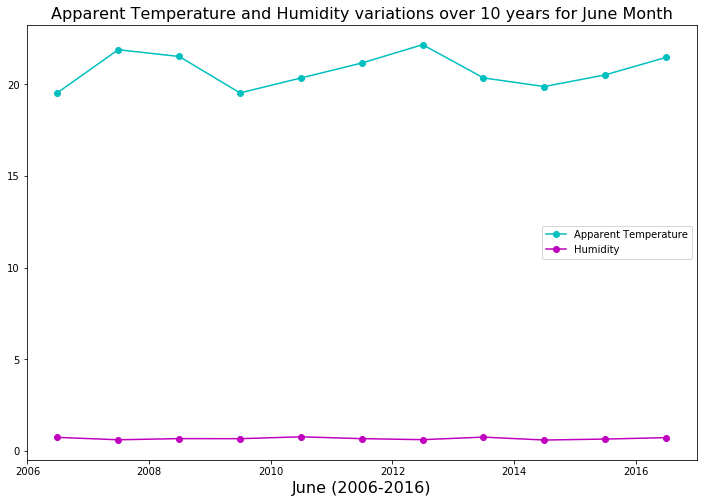

In [14]:
plt.figure(figsize=(12,8))
plt.plot(june['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(june['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for June Month',fontsize=16)
plt.xlabel('June (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

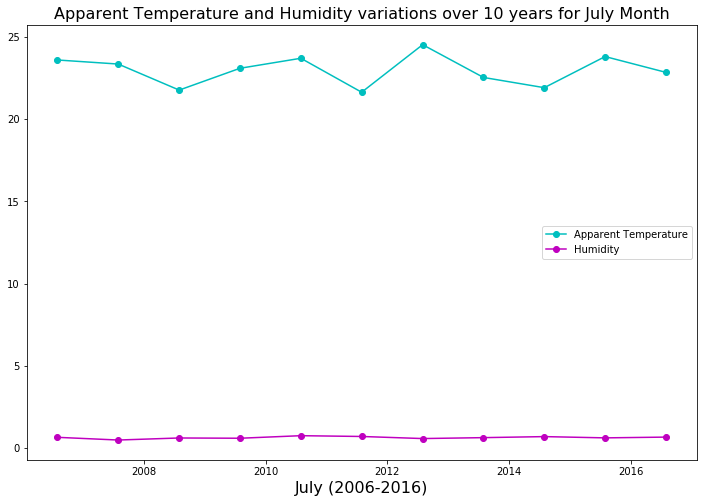

In [15]:
plt.figure(figsize=(12,8))
plt.plot(july['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(july['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for July Month',fontsize=16)
plt.xlabel('July (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

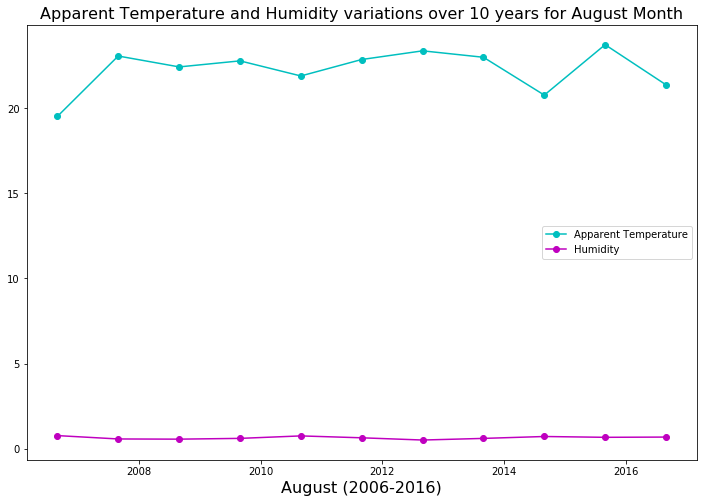

In [16]:
plt.figure(figsize=(12,8))
plt.plot(august['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(august['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for August Month',fontsize=16)
plt.xlabel('August (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

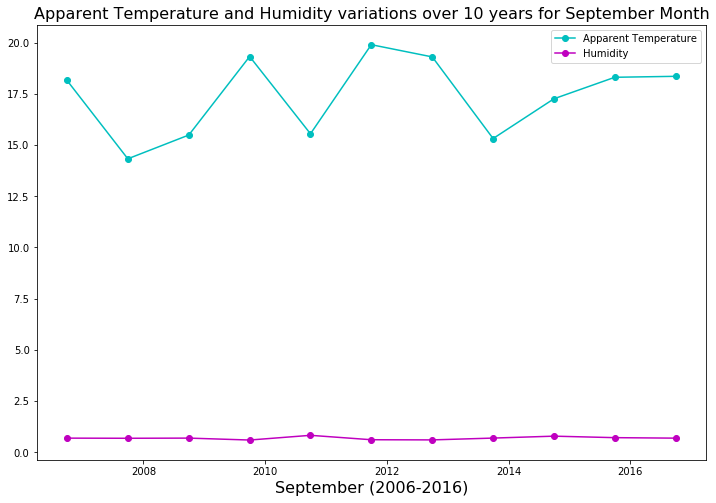

In [17]:
plt.figure(figsize=(12,8))
plt.plot(september['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(september['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for September Month',fontsize=16)
plt.xlabel('September (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

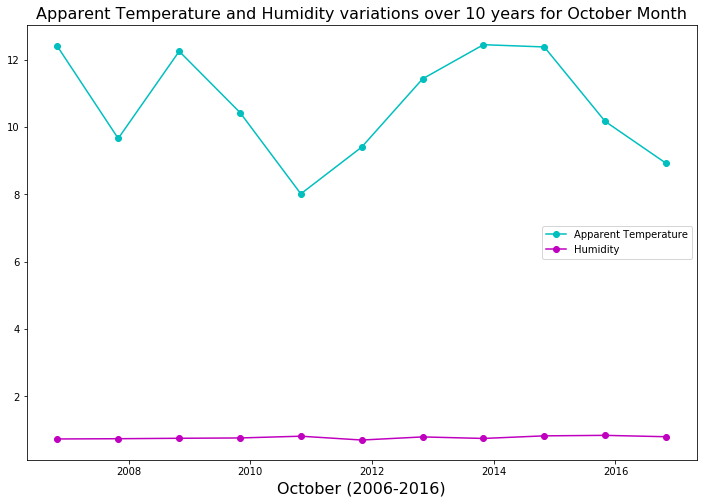

In [18]:
plt.figure(figsize=(12,8))
plt.plot(october['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(october['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for October Month',fontsize=16)
plt.xlabel('October (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

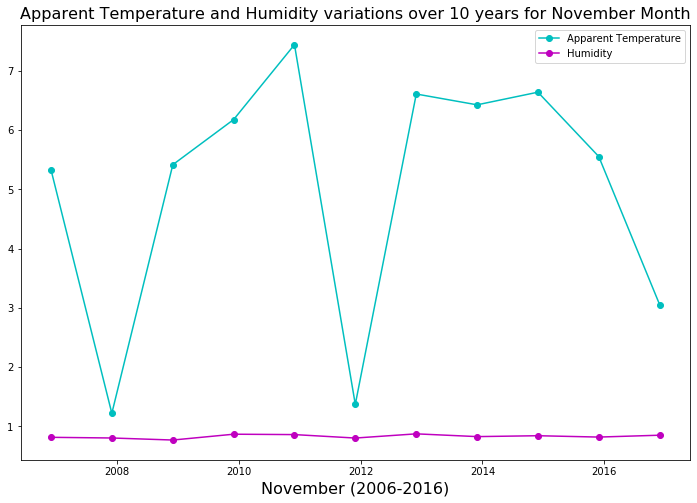

In [19]:
plt.figure(figsize=(12,8))
plt.plot(november['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(november['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for November Month',fontsize=16)
plt.xlabel('November (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

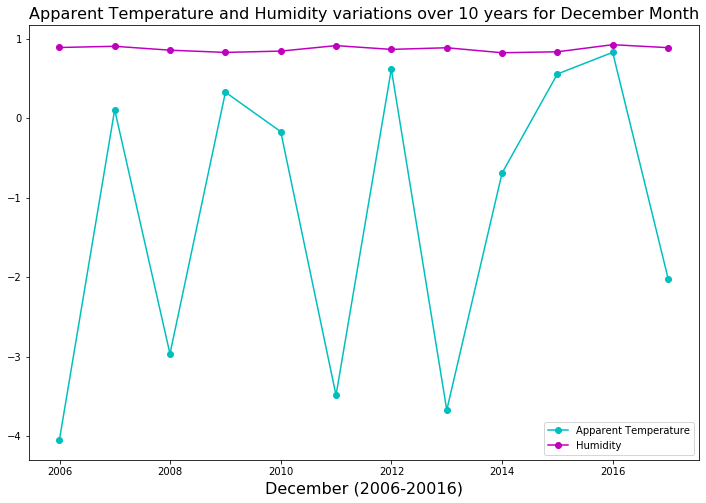

In [47]:
plt.figure(figsize=(12,8))
plt.plot(december['Apparent Temperature (C)'],'co-',label='Apparent Temperature')
plt.plot(december['Humidity'],'mo-',label='Humidity')
plt.title('Apparent Temperature and Humidity variations over 10 years for December Month',fontsize=16)
plt.xlabel('December (2006-2016)',fontsize=16)
plt.legend() #display labels
plt.show()

In [20]:
import scipy.stats as stats

_,p_value=stats.ttest_rel(a=df['Humidity'],b=df['Apparent Temperature (C)'])

print(p_value)

6.686806828886333e-24


In [21]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis
